<a href="https://colab.research.google.com/github/vaishnaviS302004/machine-learning-lab/blob/main/marcov0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


# Define the states and transition matrix
states = ["S", "R", "C"]
transition_matrix = np.array([[0.7, 0.2, 0.1], [0.4, 0.4, 0.2], [0.3, 0.3, 0.4]])

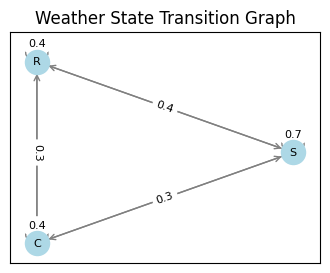

In [2]:
G = nx.DiGraph()

# Add edges with weights from the transition matrix
for i, state_from in enumerate(states):
    for j, state_to in enumerate(states):
        weight = transition_matrix[i][j]
        G.add_edge(state_from, state_to, weight=weight)

# Define positions for nodes
pos = nx.circular_layout(G)  # Arrange nodes in a circular layout

# Draw the graph
plt.figure(figsize=(4, 3))
nx.draw_networkx_nodes(G, pos, node_size=300, node_color="lightblue")
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

# Add edge labels (transition probabilities)
edge_labels = {(state_from, state_to): f"{data['weight']:.1f}"
               for state_from, state_to, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Weather State Transition Graph")
plt.show()


In [3]:
# Lets use Markov Chain to predict the weather for the next 2 days
# Initial state distribution (assuming starting in state "S")
initial_state = np.array([1, 0, 0])  # 100% chance of starting in state "S"

# Number of days to predict
num_days = 2

# Initialize the state distribution
state_distribution = initial_state.copy()


# Store the state distributions for each day
state_distributions = [state_distribution.copy()]

# Iterate through each day to predict the weather
for day in range(num_days):
    # Update the state distribution using the transition matrix
    state_distribution = np.dot(state_distribution, transition_matrix)
    state_distributions.append(state_distribution.copy())

# Print the predicted state distributions for each day
print("Predicted state distributions for each day:")
for day, distribution in enumerate(state_distributions):
    print(f"Day {day}: {distribution}")

# Convert state distributions to percentages
state_distributions_percentage = [dist * 100 for dist in state_distributions]

Predicted state distributions for each day:
Day 0: [1 0 0]
Day 1: [0.7 0.2 0.1]
Day 2: [0.6  0.25 0.15]


In [4]:
import numpy as np

# Define the transition matrix
transition_matrix = np.array([
    [0.7, 0.2, 0.1],  # From Sunny
    [0.4, 0.4, 0.2],  # From Rainy
    [0.3, 0.3, 0.4]   # From Cloudy
])

# Initial state: Sunny = [1, 0, 0]
initial_state = np.array([1, 0, 0])

# Number of days to predict
days = 10

# Multiply the state vector by the transition matrix for 10 steps
current_state = initial_state
for _ in range(days):
    current_state = np.dot(current_state, transition_matrix)

# Print final probabilities after 10 days
print("Weather probabilities after 10 days:")
print(f"Sunny:  {current_state[0]:.4f}")
print(f"Rainy:  {current_state[1]:.4f}")
print(f"Cloudy: {current_state[2]:.4f}")

# Food mapping
food_mapping = {
    0: "Ice Cream",   # Sunny
    1: "Soup",        # Rainy
    2: "Sandwiches"   # Cloudy
}

# Find the most likely weather state
most_likely_state = np.argmax(current_state)
predicted_food = food_mapping[most_likely_state]

print(f"\nPredicted food item served after 10 days: {predicted_food}")

Weather probabilities after 10 days:
Sunny:  0.5455
Rainy:  0.2727
Cloudy: 0.1818

Predicted food item served after 10 days: Ice Cream
